In [2]:
#import packages
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pylab as plt
import math
import seaborn as sbn
%matplotlib inline

In [3]:
brook = pd.read_csv("Brooklyn_EntireHomeApt.csv") #read in Brooklyn data


In [1]:
fig, ax = plt.subplots()
ax.set_xscale('log')
brook['lprice'] = np.log(brook.price)
ax.set_title('Brooklyn Prices', fontsize = 18)
ax.set_xlabel('price')
ax.set_ylabel('count')
brook.lprice.hist(ax=ax, bins = 50)

NameError: name 'plt' is not defined

{'whiskers': [<matplotlib.lines.Line2D at 0x1c35134d30>,
 'caps': [<matplotlib.lines.Line2D at 0x1c35140748>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c35134be0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c35140dd8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c35140eb8>],
 'means': []}

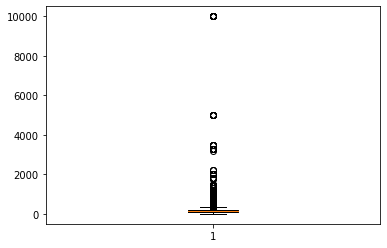

<Figure size 2016x1296 with 0 Axes>

In [92]:
from matplotlib.patches import Polygon
fig, ax = plt.subplots()
plt.figure(figsize=(28,18))
ax.boxplot(brook.price)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c39d4aba8>,
 'caps': [<matplotlib.lines.Line2D at 0x1c39d4aeb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c39d4a7b8>],
 'medians': [<matplotlib.lines.Line2D at 0x1c39d58940>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c39d58c88>],
 'means': []}

<Figure size 3600x3600 with 0 Axes>

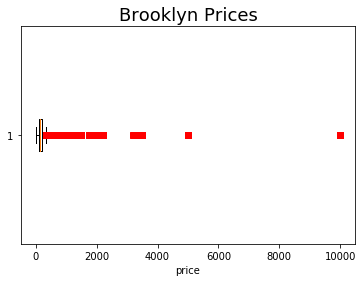

In [106]:
plt.figure(figsize=(50,50))
fig, ax = plt.subplots()
#ax.set_xscale('log')
#plt.figure(figsize=(10,50))
ax.set_title('Brooklyn Prices', fontsize = 18)
ax.set_xlabel('price')
#ax.set_ylabel('response')
ax.boxplot(brook.price, 0, 'rs', 0)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c39db3780>,
 'caps': [<matplotlib.lines.Line2D at 0x1c39db3e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c39db33c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1c39dc0550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c39dc0898>],
 'means': []}

<Figure size 3600x3600 with 0 Axes>

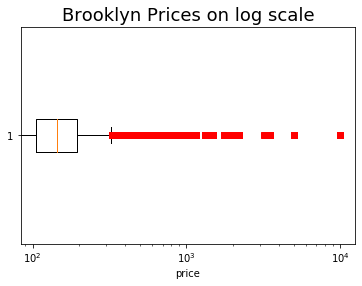

In [107]:
plt.figure(figsize=(50,50))
fig, ax = plt.subplots()
ax.set_xscale('log')
#plt.figure(figsize=(10,50))
ax.set_title('Brooklyn Prices on log scale', fontsize = 18)
ax.set_xlabel('price')
#ax.set_ylabel('response')
ax.boxplot(brook.price, 0, 'rs', 0)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


{'whiskers': [<matplotlib.lines.Line2D at 0x1c392ced68>,
 'caps': [<matplotlib.lines.Line2D at 0x1c3932db38>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c3932d080>],
 'medians': [<matplotlib.lines.Line2D at 0x1c3932df60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c39342550>],
 'means': []}

<Figure size 3600x3600 with 0 Axes>

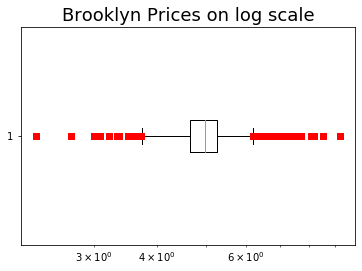

In [104]:
plt.figure(figsize=(50,50))
fig, ax = plt.subplots()
ax.set_xscale('log')
brook['lprice'] = np.log(brook.price)
#plt.figure(figsize=(10,50))
ax.set_title('Brooklyn Prices on log scale', fontsize = 18)
ax.boxplot(brook.lprice, 0, 'rs', 0)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c3a1cfe10>,
 'caps': [<matplotlib.lines.Line2D at 0x1c3a1d94e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c3a1cf9e8>],
 'medians': [<matplotlib.lines.Line2D at 0x1c3a1d9b70>],
 'fliers': [],
 'means': []}

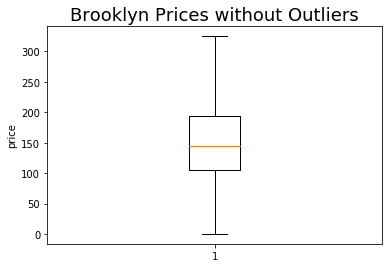

<Figure size 2016x1296 with 0 Axes>

In [109]:
fig, ax = plt.subplots()
plt.figure(figsize=(28,18))
#ax.set_xlabel('treatment')
ax.set_title('Brooklyn Prices without Outliers', fontsize = 18)
ax.set_ylabel('price')
ax.boxplot(brook.price, 0, '')

In [4]:
brook= brook.loc[(brook.price<=2000)]
brook

,Unnamed: 0,id,last_scraped,name,summary,description,host_id,neighbourhood_group_cleansed,state,latitude,...,nearest_subwayID,subwayLine,subwayStop,subwayLong,subwayDistance_km,subwayLat,mhi18,minimum_nights,available,numReviews18
0,0,19330743,2018-04-07,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,Brooklyn,NY,40.640762,...,220.0,L,E 105th St,-73.899548,3.268706,40.650469,103725.0,3,151.0,23.0
1,1,22632338,2018-04-08,Renovated 3 bedroom Suite,Beautifully renovated 3 floor townhouse. The a...,Beautifully renovated 3 floor townhouse. The a...,156042211,Brooklyn,NY,40.649942,...,220.0,L,E 105th St,-73.899548,0.503245,40.650469,22479.0,2,324.0,21.0
2,2,1178231,2018-04-08,"Private, Cozy hideaway apt in Bklyn for 2 to 4.","Enjoy your visit in a cozy, safe apt. Buses an...","Enjoy your visit in a cozy, safe apt. Buses an...",6445684,Brooklyn,NY,40.642983,...,220.0,L,E 105th St,-73.899548,2.106218,40.650469,70766.0,1,338.0,4.0
3,3,1178231,2018-08-07,"Private, Cozy hideaway apt in Bklyn for 2 to 4.","Enjoy your visit in a cozy, safe apt. Buses an...","Enjoy your visit in a cozy, safe apt. Buses an...",6445684,Brooklyn,NY,40.642983,...,220.0,L,E 105th St,-73.899548,2.106218,40.650469,70766.0,1,338.0,4.0
4,4,19330743,2018-08-07,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,Brooklyn,NY,40.640762,...,220.0,L,E 105th St,-73.899548,3.268706,40.650469,103725.0,3,151.0,23.0
5,5,22632338,2018-08-07,Hidden Gem - Entire Bklyn Apt,Beautifully renovated 3 floor townhouse. The a...,Beautifully renovated 3 floor townhouse. The a...,156042211,Brooklyn,NY,40.649942,...,220.0,L,E 105th St,-73.899548,0.503245,40.650469,22479.0,2,324.0,21.0
6,6,1178231,2018-09-08,"Private, Cozy hideaway apt in Bklyn for 2 to 4.","Enjoy your visit in a cozy, safe apt. Buses an...","Enjoy your visit in a cozy, safe apt. Buses an...",6445684,Brooklyn,NY,40.642983,...,220.0,L,E 105th St,-73.899548,2.106218,40.650469,70766.0,1,338.0,4.0
7,7,19330743,2018-09-08,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,Brooklyn,NY,40.640762,...,220.0,L,E 105th St,-73.899548,3.268706,40.650469,103725.0,3,151.0,23.0
8,8,22632338,2018-09-08,Hidden Gem - Entire Bklyn Apt,Beautifully renovated 3 floor townhouse. The a...,Beautifully renovated 3 floor townhouse. The a...,156042211,Brooklyn,NY,40.649942,...,220.0,L,E 105th St,-73.899548,0.503245,40.650469,22479.0,2,324.0,21.0
9,9,1178231,2018-12-06,"Private, Cozy hideaway apt in Bklyn for 2 to 4.","Enjoy your visit in a cozy, safe apt. Buses an...","Enjoy your visit in a cozy, safe apt. Buses an...",6445684,Brooklyn,NY,40.642983,...,220.0,L,E 105th St,-73.899548,2.106218,40.650469,70766.0,1,338.0,4.0


In [4]:
brook.corr()

,Unnamed: 0,id,host_id,latitude,longitude,cleaning_fee,price,host_is_superhost,host_total_listings_count,accommodates,...,review_scores_rating,amenities_count,nearest_subwayID,subwayLong,subwayDistance_km,subwayLat,mhi18,minimum_nights,available,numReviews18
Unnamed: 0,1.000000,0.014116,0.050568,-0.285779,-0.349376,0.017618,0.019060,-0.027360,-0.009626,-0.001135,...,-0.002639,0.008868,0.181777,-0.348541,-0.041153,-0.296794,0.261595,0.005378,-0.008446,-0.022617
id,0.014116,1.000000,0.495904,-0.024307,0.076966,-0.065663,-0.054615,-0.011403,0.027094,0.035851,...,0.061221,0.095648,0.023615,0.080913,0.049354,-0.020966,-0.082570,0.006087,-0.224635,-0.009433
host_id,0.050568,0.495904,1.000000,-0.127877,0.116534,-0.009395,-0.033522,0.030527,0.030417,0.127824,...,-0.052241,0.102017,0.027825,0.113455,0.077737,-0.122805,-0.089643,0.018656,0.026819,0.166809
latitude,-0.285779,-0.024307,-0.127877,1.000000,0.193989,0.069755,0.153969,-0.023383,-0.019752,-0.079667,...,0.059956,-0.087212,-0.157505,0.221099,-0.130351,0.992667,0.015353,0.002182,-0.122573,-0.052594
longitude,-0.349376,0.076966,0.116534,0.193989,1.000000,-0.080809,-0.130987,0.050298,0.083448,0.088296,...,-0.077307,0.064400,-0.228448,0.989266,0.043195,0.206428,-0.554492,-0.011876,0.088748,0.136524
cleaning_fee,0.017618,-0.065663,-0.009395,0.069755,-0.080809,1.000000,0.494827,0.064365,0.123057,0.452222,...,0.032087,0.194158,0.028628,-0.079221,0.010904,0.069624,0.097401,0.017839,0.147747,-0.071571
price,0.019060,-0.054615,-0.033522,0.153969,-0.130987,0.494827,1.000000,0.039924,0.087335,0.504389,...,0.071518,0.130156,0.013399,-0.124431,0.008995,0.154121,0.153897,-0.001196,0.102205,-0.079614
host_is_superhost,-0.027360,-0.011403,0.030527,-0.023383,0.050298,0.064365,0.039924,1.000000,0.092192,0.084238,...,0.189534,0.295657,-0.007389,0.052384,0.044512,-0.021735,-0.033148,-0.006495,0.111827,0.388832
host_total_listings_count,-0.009626,0.027094,0.030417,-0.019752,0.083448,0.123057,0.087335,0.092192,1.000000,0.180088,...,-0.069344,0.077948,0.012806,0.084481,0.016817,-0.021975,-0.065974,-0.002780,0.135386,0.050693
accommodates,-0.001135,0.035851,0.127824,-0.079667,0.088296,0.452222,0.504389,0.084238,0.180088,1.000000,...,-0.063986,0.243947,0.009752,0.087017,0.027265,-0.076479,-0.073781,-0.009897,0.192063,0.165727


In [28]:
brook.shape

(83659, 36)

In [5]:
brook = brook.dropna()

In [37]:
brook.shape

(48260, 36)

In [38]:
brook.isna().sum()

Unnamed: 0                      0
id                              0
last_scraped                    0
name                            0
summary                         0
description                     0
host_id                         0
neighbourhood_group_cleansed    0
state                           0
latitude                        0
longitude                       0
property_type                   0
room_type                       0
amenities                       0
cleaning_fee                    0
price                           0
host_is_superhost               0
host_total_listings_count       0
accommodates                    0
bathrooms                       0
bedrooms                        0
beds                            0
guests_included                 0
review_scores_rating            0
amenities_count                 0
geometry                        0
nearest_subwayID                0
subwayLine                      0
subwayStop                      0
subwayLong    

In [6]:
np.random.seed(2018)
splitind=np.random.uniform(size=len(brook))
BTrain=brook.loc[splitind<=0.8]
BTest=brook.loc[(splitind>0.8)&(splitind<0.9)]
BValid=brook.loc[(splitind>=0.9)]
BTrain

,Unnamed: 0,id,last_scraped,name,summary,description,host_id,neighbourhood_group_cleansed,state,latitude,...,nearest_subwayID,subwayLine,subwayStop,subwayLong,subwayDistance_km,subwayLat,mhi18,minimum_nights,available,numReviews18
1,1,22632338,2018-04-08,Renovated 3 bedroom Suite,Beautifully renovated 3 floor townhouse. The a...,Beautifully renovated 3 floor townhouse. The a...,156042211,Brooklyn,NY,40.649942,...,220.0,L,E 105th St,-73.899548,0.503245,40.650469,22479.0,2,324.0,21.0
3,3,1178231,2018-08-07,"Private, Cozy hideaway apt in Bklyn for 2 to 4.","Enjoy your visit in a cozy, safe apt. Buses an...","Enjoy your visit in a cozy, safe apt. Buses an...",6445684,Brooklyn,NY,40.642983,...,220.0,L,E 105th St,-73.899548,2.106218,40.650469,70766.0,1,338.0,4.0
4,4,19330743,2018-08-07,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,Brooklyn,NY,40.640762,...,220.0,L,E 105th St,-73.899548,3.268706,40.650469,103725.0,3,151.0,23.0
5,5,22632338,2018-08-07,Hidden Gem - Entire Bklyn Apt,Beautifully renovated 3 floor townhouse. The a...,Beautifully renovated 3 floor townhouse. The a...,156042211,Brooklyn,NY,40.649942,...,220.0,L,E 105th St,-73.899548,0.503245,40.650469,22479.0,2,324.0,21.0
7,7,19330743,2018-09-08,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,Brooklyn,NY,40.640762,...,220.0,L,E 105th St,-73.899548,3.268706,40.650469,103725.0,3,151.0,23.0
9,9,1178231,2018-12-06,"Private, Cozy hideaway apt in Bklyn for 2 to 4.","Enjoy your visit in a cozy, safe apt. Buses an...","Enjoy your visit in a cozy, safe apt. Buses an...",6445684,Brooklyn,NY,40.642983,...,220.0,L,E 105th St,-73.899548,2.106218,40.650469,70766.0,1,338.0,4.0
10,10,19330743,2018-12-06,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,Brooklyn,NY,40.640762,...,220.0,L,E 105th St,-73.899548,3.268706,40.650469,103725.0,3,151.0,23.0
12,12,1178231,2018-02-04,"Private, Cozy hideaway apt in Bklyn for 2 to 4.","Enjoy your visit in a cozy, safe apt. Buses an...","Enjoy your visit in a cozy, safe apt. Buses an...",6445684,Brooklyn,NY,40.642983,...,220.0,L,E 105th St,-73.899548,2.106218,40.650469,70766.0,1,338.0,4.0
14,14,19330743,2018-02-04,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,Brooklyn,NY,40.640762,...,220.0,L,E 105th St,-73.899548,3.268706,40.650469,103725.0,3,151.0,23.0
16,16,1178231,2018-01-12,"Private, Cozy hideaway apt in Bklyn for 2 to 4.","Enjoy your visit in a cozy, safe apt. Buses an...","Enjoy your visit in a cozy, safe apt. Buses an...",6445684,Brooklyn,NY,40.642983,...,220.0,L,E 105th St,-73.899548,2.106218,40.650469,70766.0,1,338.0,4.0


In [21]:
lm_B = smf.ols('price ~ accommodates + bathrooms + review_scores_rating + subwayDistance_km + cleaning_fee + latitude + longitude + amenities_count + mhi18 + available + minimum_nights - 1', data = BTrain).fit()
lm_B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.878
Method:                 Least Squares   F-statistic:                          2.519e+04
Date:                Mon, 16 Dec 2019   Prob (F-statistic):                        0.00
Time:                        17:24:52   Log-Likelihood:                     -2.1824e+05
No. Observations:               38587   AIC:                                  4.365e+05
Df Residuals:                   38576   BIC:                                  4.366e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
accommodates            11.6083      0.196     59.247      0.000      11.224      11.992
bathrooms               72.3609      0.817     88.524      0.000      70.759      73.963
review_scores_rating     1.6678      0.070     23.787      0.000       1.530       1.805
subwayDistance_km       -4.9749      0.686     -7.253      0.000      -6.319      -3.631
cleaning_fee             0.4888      0.009     54.378      0.000       0.471       0.506
latitude               375.0716     11.696     32.068      0.000     352.147     397.996
longitude              209.1633      6.436     32.499      0.000     196.549     221.778
amenities_count         -0.0454      0.037     -1.230      0.219      -0.118       0.027
mhi18                    0.0007   1.43e-05     50.611      0.000       0.001       0.001
available                0.0282      0.003      9.840      0.000       0.023       0.034
minimum_nights          -0.3465      0.041     -8.470      0.000      -0.427      -0.266
==============================================================================
Omnibus:                    21935.681   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           612144.062
Skew:                           2.217   Prob(JB):                         0.00
Kurtosis:                      22.002   Cond. No.                     2.52e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
from sklearn.metrics import r2_score
BValid.dropna(inplace=True)
r2_score(BValid.price,lm_B.predict(BValid))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.5373732551539356

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [10]:
BValid.columns

Index(['Unnamed: 0', 'id', 'last_scraped', 'name', 'summary', 'description',
       'host_id', 'neighbourhood_group_cleansed', 'state', 'latitude',
       'longitude', 'property_type', 'room_type', 'amenities', 'cleaning_fee',
       'price', 'host_is_superhost', 'host_total_listings_count',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included',
       'review_scores_rating', 'amenities_count', 'geometry',
       'nearest_subwayID', 'subwayLine', 'subwayStop', 'subwayLong',
       'subwayDistance_km', 'subwayLat', 'mhi18', 'minimum_nights',
       'available', 'numReviews18'],
      dtype='object')

In [24]:
btrainS = BTrain.copy()
bvalidS = BValid.copy()
btestS = BTest.copy()
brookS = brook.copy()

In [25]:
col_names = ['accommodates', 'bathrooms', 'subwayDistance_km', 'cleaning_fee', 'latitude', 'longitude', 'amenities_count', 'mhi18', 'available', 'minimum_nights', 'review_scores_rating','numReviews18']
featuresTrain = btrainS[col_names]
featuresTest = btestS[col_names]
featuresValid = bvalidS[col_names]
featuresgen = brookS[col_names]
scaler = StandardScaler().fit(featuresTrain.values)
featuresTrain = scaler.transform(featuresTrain.values)
featuresTest = scaler.transform(featuresTest.values)
featuresValid = scaler.transform(featuresValid.values)
scaler2 = StandardScaler().fit(featuresgen.values)
featuresgen = scaler2.transform(featuresgen.values)

In [26]:
btrainS[col_names] = featuresTrain
bvalidS[col_names] = featuresValid
btestS[col_names] = featuresTest
brookS[col_names] = featuresgen
brookS.head()

,Unnamed: 0,id,last_scraped,name,summary,description,host_id,neighbourhood_group_cleansed,state,latitude,...,nearest_subwayID,subwayLine,subwayStop,subwayLong,subwayDistance_km,subwayLat,mhi18,minimum_nights,available,numReviews18
0,0,19330743,2018-04-07,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,Brooklyn,NY,-1.697133,...,220.0,L,E 105th St,-73.899548,4.944843,40.650469,1.651898,-0.153154,-0.161351,0.122096
1,1,22632338,2018-04-08,Renovated 3 bedroom Suite,Beautifully renovated 3 floor townhouse. The a...,Beautifully renovated 3 floor townhouse. The a...,156042211,Brooklyn,NY,-1.341383,...,220.0,L,E 105th St,-73.899548,-0.443226,40.650469,-1.491279,-0.265071,1.179736,0.012597
2,2,1178231,2018-04-08,"Private, Cozy hideaway apt in Bklyn for 2 to 4.","Enjoy your visit in a cozy, safe apt. Buses an...","Enjoy your visit in a cozy, safe apt. Buses an...",6445684,Brooklyn,NY,-1.611093,...,220.0,L,E 105th St,-73.899548,2.679916,40.650469,0.376808,-0.376987,1.288263,-0.918140
3,3,1178231,2018-08-07,"Private, Cozy hideaway apt in Bklyn for 2 to 4.","Enjoy your visit in a cozy, safe apt. Buses an...","Enjoy your visit in a cozy, safe apt. Buses an...",6445684,Brooklyn,NY,-1.611093,...,220.0,L,E 105th St,-73.899548,2.679916,40.650469,0.376808,-0.376987,1.288263,-0.918140
4,4,19330743,2018-08-07,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,Brooklyn,NY,-1.697133,...,220.0,L,E 105th St,-73.899548,4.944843,40.650469,1.651898,-0.153154,-0.161351,0.122096


In [14]:
btrainS.shape

(38587, 36)

In [27]:
from sklearn.metrics import r2_score
Ridge=linear_model.Ridge(fit_intercept=True, alpha=4.54)
Ridge.fit(btrainS[col_names],btrainS.price)
# In sample:
PricePredRidge_IS=Ridge.predict(btrainS[col_names])
print("The IS R-squared of Ridge is: {}".format(r2_score(btrainS.price,PricePredRidge_IS)))
Ridge.coef_
PricePredRidge_OS=Ridge.predict(btestS[col_names])
print("The OS R-squared of Ridge is: {0}".format(r2_score(btestS.price,PricePredRidge_OS)))

The IS R-squared of Ridge is: 0.5890301044496637
The OS R-squared of Ridge is: 0.5842193616974589


In [28]:
#from sklearn.metrics import r2_score
#apply ridge to final model
RidgeB=linear_model.Ridge(fit_intercept=True, alpha=0.0000454)
RidgeB.fit(brookS[col_names],brookS.price)
# In sample:
PricePredRidge_IS=RidgeB.predict(brookS[col_names])
print("The IS R-squared of Ridge is: {}".format(r2_score(brookS.price,PricePredRidge_IS)))
RidgeB.coef_
#PricePredRidge_OS=Ridge.predict(btestS[col_names])
#print("The OS R-squared of Ridge is: {0}".format(r2_score(btestS.price,PricePredRidge_OS)))

The IS R-squared of Ridge is: 0.5876818886791224


array([ 32.38933196,  36.39735115,   0.32488144,  17.68024592,
        22.24760031, -15.5272598 ,   3.62876637,   8.15802664,
         8.070105  ,  -4.73047742,   7.67273017, -10.43158446])

In [29]:
#try Lasso with an another arbitrary regularization parameter alpha=0.01 (if we try alpha=1 this turns out to be too much regularization already)
Lasso=linear_model.Lasso(fit_intercept=True, alpha=0.00454)

Lasso.fit(btrainS[col_names],btrainS.price)
# In sample:
PricePredLasso_IS=Lasso.predict(btrainS[col_names])
print("The IS R-squared of Lasso is: {0}".format(r2_score(btrainS.price,PricePredLasso_IS)))
#Out of sample
PricePredLasso_OS=Lasso.predict(btestS[col_names])
print("The OS R-squared of Lasso is: {0}".format(r2_score(btestS.price,PricePredLasso_OS)))
Lasso.coef_

The IS R-squared of Lasso is: 0.5890300848145914
The OS R-squared of Lasso is: 0.5842173345921684


array([ 32.12864765,  36.79330187,   0.21240948,  17.42751507,
        22.20369035, -15.446647  ,   3.44557505,   8.03241803,
         8.18303881,  -4.94708227,   7.69867249, -10.37975154])

In [30]:
#Find the Alpha and report best test performance for Ridge/Lasso.
def Regularization_fit_alpha(model,X_train,y_train,X_valid,y_valid,alphas,Graph=False, logl=False):
    #model = 1-Ridge, 2-Lasso
    #aplhas: a list of aplha values to try
    #Graph: plot the graph of R^2 values for different alpha

    R_2_OS=[] #out of sample R2's
    
    #initialize the model to use for each given alpha
    if model==1:
        RM = lambda a: linear_model.Ridge(fit_intercept=True, alpha=a)
        model_label='Ridge'
    else:
        RM = lambda a: linear_model.Lasso(fit_intercept=True, alpha=a)
        model_label='Lasso'
    
    best_R2 = -1
    best_alpha = alphas[0]
    best_coefs = []
    
    for a in alphas: #for all alphas to try
        lm = RM(a) #assign the model
        lm.fit(X_train,y_train)  #fit the regularization model
        y_predict=lm.predict(X_valid) #compute the prediction for the validation sample 
        R_2_OS_=r2_score(y_valid,y_predict)
        R_2_OS.append(R_2_OS_)
        if R_2_OS_ > best_R2: #if current OS R2 is the best - update the best solution
            best_R2 = R_2_OS_
            best_alpha = a
            best_coefs = lm.coef_
    
    if Graph==True: #visualization of the performance depending on alpha
        plt.title('OS-R-squared for different Alpha')
        if logl: #log-scale
            plt.xlabel('ln(Alpha)')
            l=np.log(alphas)
            bl=np.log(best_alpha)
        else:
            plt.xlabel('Alpha')
            l=alphas
            bl=best_alpha
        plt.ylim((-0.1,1))
        plt.plot(l,R_2_OS,'b',label=model_label)
        plt.legend(loc='upper right')
        plt.ylabel('R-squared')
        plt.axvline(bl,color='r',linestyle='--')

        plt.show()
    
    return [best_alpha,best_R2,best_coefs]

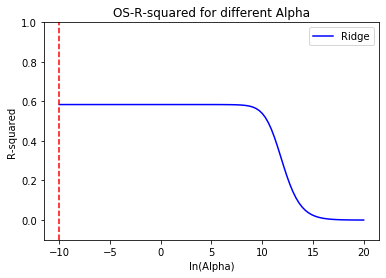

Optimal alpha for Ridge=4.5399929762484854e-05, best OS R_2=0.5842215511069478


In [31]:
alphas = np.exp(np.linspace(-10,20,100)) #exponential range of possible alphas
[alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(1,btrainS[col_names],btrainS.price,btestS[col_names],btestS.price,alphas,Graph=True,logl=True)
print('Optimal alpha for Ridge={0}, best OS R_2={1}'.format(alpha_optimal,best_R2))

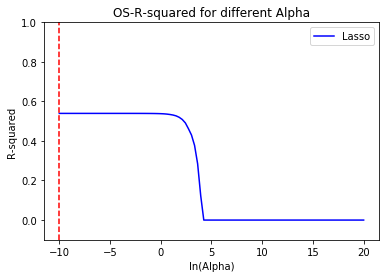

Optimal alpha for Lasso=4.5399929762484854e-05, best OS R_2=0.5394740849061853


In [18]:
alphas = np.exp(np.linspace(-10,20,100)) #exponential range of possible alphas
[alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(2,btrainS[col_names],btrainS.price,btestS[col_names],btestS.price,alphas,Graph=True,logl=True)
print('Optimal alpha for Lasso={0}, best OS R_2={1}'.format(alpha_optimal,best_R2))

In [32]:
lm_B1 = smf.ols('price ~ accommodates + bathrooms + subwayDistance_km + latitude + longitude + cleaning_fee  + amenities_count + mhi18 + available + minimum_nights + numReviews18 + review_scores_rating - 1', data = brook).fit()
lm_B1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.879
Model:                            OLS   Adj. R-squared (uncentered):              0.879
Method:                 Least Squares   F-statistic:                          2.928e+04
Date:                Mon, 16 Dec 2019   Prob (F-statistic):                        0.00
Time:                        17:31:07   Log-Likelihood:                     -2.7269e+05
No. Observations:               48260   AIC:                                  5.454e+05
Df Residuals:                   48248   BIC:                                  5.455e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
accommodates            12.7045      0.177     71.596      0.000      12.357      13.052
bathrooms               68.6294      0.729     94.108      0.000      67.200      70.059
subwayDistance_km       -4.2610      0.617     -6.907      0.000      -5.470      -3.052
latitude               388.2983     10.378     37.417      0.000     367.958     408.638
longitude              216.4196      5.710     37.900      0.000     205.227     227.612
cleaning_fee             0.4479      0.008     55.184      0.000       0.432       0.464
amenities_count          0.2297      0.034      6.804      0.000       0.164       0.296
mhi18                    0.0007   1.28e-05     56.636      0.000       0.001       0.001
available                0.0455      0.003     17.393      0.000       0.040       0.051
minimum_nights          -0.5313      0.036    -14.707      0.000      -0.602      -0.461
numReviews18            -0.6032      0.019    -31.106      0.000      -0.641      -0.565
review_scores_rating     1.7197      0.062     27.794      0.000       1.598       1.841
==============================================================================
Omnibus:                    27354.433   Durbin-Watson:                   1.781
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           768508.804
Skew:                           2.206   Prob(JB):                         0.00
Kurtosis:                      22.045   Cond. No.                     2.51e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
brook['predicted_price'] = lm_B1.predict(brook)
brook.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,id,last_scraped,name,summary,description,host_id,neighbourhood_group_cleansed,state,latitude,...,subwayLine,subwayStop,subwayLong,subwayDistance_km,subwayLat,mhi18,minimum_nights,available,numReviews18,predicted_price
0,0,19330743,2018-04-07,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,Brooklyn,NY,40.640762,...,L,E 105th St,-73.899548,3.268706,40.650469,103725.0,3,151.0,23.0,136.026085
1,1,22632338,2018-04-08,Renovated 3 bedroom Suite,Beautifully renovated 3 floor townhouse. The a...,Beautifully renovated 3 floor townhouse. The a...,156042211,Brooklyn,NY,40.649942,...,L,E 105th St,-73.899548,0.503245,40.650469,22479.0,2,324.0,21.0,158.366797
2,2,1178231,2018-04-08,"Private, Cozy hideaway apt in Bklyn for 2 to 4.","Enjoy your visit in a cozy, safe apt. Buses an...","Enjoy your visit in a cozy, safe apt. Buses an...",6445684,Brooklyn,NY,40.642983,...,L,E 105th St,-73.899548,2.106218,40.650469,70766.0,1,338.0,4.0,179.793774
3,3,1178231,2018-08-07,"Private, Cozy hideaway apt in Bklyn for 2 to 4.","Enjoy your visit in a cozy, safe apt. Buses an...","Enjoy your visit in a cozy, safe apt. Buses an...",6445684,Brooklyn,NY,40.642983,...,L,E 105th St,-73.899548,2.106218,40.650469,70766.0,1,338.0,4.0,179.793774
4,4,19330743,2018-08-07,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,Brooklyn,NY,40.640762,...,L,E 105th St,-73.899548,3.268706,40.650469,103725.0,3,151.0,23.0,132.586610


In [34]:
brookS['ridge_pred'] = RidgeB.predict(brookS[col_names])
brookS.head()

,Unnamed: 0,id,last_scraped,name,summary,description,host_id,neighbourhood_group_cleansed,state,latitude,...,subwayLine,subwayStop,subwayLong,subwayDistance_km,subwayLat,mhi18,minimum_nights,available,numReviews18,ridge_pred
0,0,19330743,2018-04-07,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,Brooklyn,NY,-1.697133,...,L,E 105th St,-73.899548,4.944843,40.650469,1.651898,-0.153154,-0.161351,0.122096,56.430852
1,1,22632338,2018-04-08,Renovated 3 bedroom Suite,Beautifully renovated 3 floor townhouse. The a...,Beautifully renovated 3 floor townhouse. The a...,156042211,Brooklyn,NY,-1.341383,...,L,E 105th St,-73.899548,-0.443226,40.650469,-1.491279,-0.265071,1.179736,0.012597,115.598136
2,2,1178231,2018-04-08,"Private, Cozy hideaway apt in Bklyn for 2 to 4.","Enjoy your visit in a cozy, safe apt. Buses an...","Enjoy your visit in a cozy, safe apt. Buses an...",6445684,Brooklyn,NY,-1.611093,...,L,E 105th St,-73.899548,2.679916,40.650469,0.376808,-0.376987,1.288263,-0.918140,112.026031
3,3,1178231,2018-08-07,"Private, Cozy hideaway apt in Bklyn for 2 to 4.","Enjoy your visit in a cozy, safe apt. Buses an...","Enjoy your visit in a cozy, safe apt. Buses an...",6445684,Brooklyn,NY,-1.611093,...,L,E 105th St,-73.899548,2.679916,40.650469,0.376808,-0.376987,1.288263,-0.918140,112.026031
4,4,19330743,2018-08-07,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,Brooklyn,NY,-1.697133,...,L,E 105th St,-73.899548,4.944843,40.650469,1.651898,-0.153154,-0.161351,0.122096,53.497780


In [35]:
brookS['resridge_price'] = brookS['price'] - brookS['ridge_pred']
brookS.head()

,Unnamed: 0,id,last_scraped,name,summary,description,host_id,neighbourhood_group_cleansed,state,latitude,...,subwayStop,subwayLong,subwayDistance_km,subwayLat,mhi18,minimum_nights,available,numReviews18,ridge_pred,resridge_price
0,0,19330743,2018-04-07,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,Brooklyn,NY,-1.697133,...,E 105th St,-73.899548,4.944843,40.650469,1.651898,-0.153154,-0.161351,0.122096,56.430852,33.569148
1,1,22632338,2018-04-08,Renovated 3 bedroom Suite,Beautifully renovated 3 floor townhouse. The a...,Beautifully renovated 3 floor townhouse. The a...,156042211,Brooklyn,NY,-1.341383,...,E 105th St,-73.899548,-0.443226,40.650469,-1.491279,-0.265071,1.179736,0.012597,115.598136,4.401864
2,2,1178231,2018-04-08,"Private, Cozy hideaway apt in Bklyn for 2 to 4.","Enjoy your visit in a cozy, safe apt. Buses an...","Enjoy your visit in a cozy, safe apt. Buses an...",6445684,Brooklyn,NY,-1.611093,...,E 105th St,-73.899548,2.679916,40.650469,0.376808,-0.376987,1.288263,-0.918140,112.026031,-12.026031
3,3,1178231,2018-08-07,"Private, Cozy hideaway apt in Bklyn for 2 to 4.","Enjoy your visit in a cozy, safe apt. Buses an...","Enjoy your visit in a cozy, safe apt. Buses an...",6445684,Brooklyn,NY,-1.611093,...,E 105th St,-73.899548,2.679916,40.650469,0.376808,-0.376987,1.288263,-0.918140,112.026031,-12.026031
4,4,19330743,2018-08-07,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,Brooklyn,NY,-1.697133,...,E 105th St,-73.899548,4.944843,40.650469,1.651898,-0.153154,-0.161351,0.122096,53.497780,36.502220


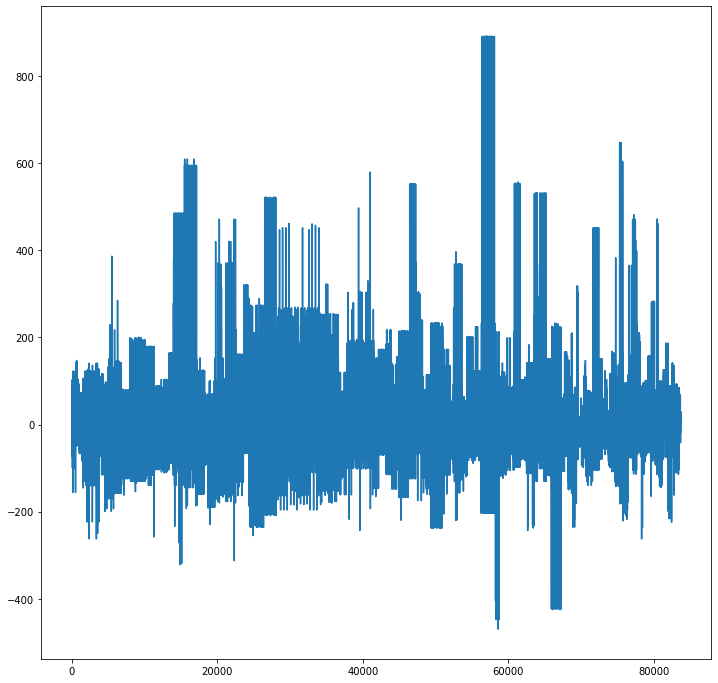

In [36]:
plt.figure(figsize=(12,12))
#plt.plot(brook['subwayDistance_km'],brook['price'], 'o')
#plt.plot(brook['subwayDistance_km'],brook['predicted_price'])
plt.plot(brookS['resridge_price'])

In [220]:
brookS.resridge_price[brookS.resridge_price > 0.0].count()

21010

In [221]:
brookS.resridge_price[brookS.resridge_price < 0.0].count()

27250

In [206]:
brookS.available[brookS.available < (2*brookS.numReviews18)].count()

48260

In [37]:
brookS[col_names] = brook[col_names]

In [38]:
brookS1 = brookS[brookS.available > (2*brookS.numReviews18)]
brookS1.shape

(39936, 38)

In [226]:
brookS1.minimum_nights[brookS1.minimum_nights > 6.4].count()

4410

In [39]:
brookS1['avgnight'] = 6.4

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
brookS1['avgnight'] = 6.4
brookS1['minstay'] = brookS1.loc[:,['avgnight', 'minimum_nights']].max(axis=1)
brookS1.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Unnamed: 0,id,last_scraped,name,summary,description,host_id,neighbourhood_group_cleansed,state,latitude,...,subwayDistance_km,subwayLat,mhi18,minimum_nights,available,numReviews18,ridge_pred,resridge_price,avgnight,minstay
0,0,19330743,2018-04-07,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,Brooklyn,NY,40.640762,...,3.268706,40.650469,103725.0,3,151.0,23.0,56.430852,33.569148,6.4,6.4
1,1,22632338,2018-04-08,Renovated 3 bedroom Suite,Beautifully renovated 3 floor townhouse. The a...,Beautifully renovated 3 floor townhouse. The a...,156042211,Brooklyn,NY,40.649942,...,0.503245,40.650469,22479.0,2,324.0,21.0,115.598136,4.401864,6.4,6.4
2,2,1178231,2018-04-08,"Private, Cozy hideaway apt in Bklyn for 2 to 4.","Enjoy your visit in a cozy, safe apt. Buses an...","Enjoy your visit in a cozy, safe apt. Buses an...",6445684,Brooklyn,NY,40.642983,...,2.106218,40.650469,70766.0,1,338.0,4.0,112.026031,-12.026031,6.4,6.4
3,3,1178231,2018-08-07,"Private, Cozy hideaway apt in Bklyn for 2 to 4.","Enjoy your visit in a cozy, safe apt. Buses an...","Enjoy your visit in a cozy, safe apt. Buses an...",6445684,Brooklyn,NY,40.642983,...,2.106218,40.650469,70766.0,1,338.0,4.0,112.026031,-12.026031,6.4,6.4
4,4,19330743,2018-08-07,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,Brooklyn,NY,40.640762,...,3.268706,40.650469,103725.0,3,151.0,23.0,53.497780,36.502220,6.4,6.4


In [41]:
brookS1['occupancy_rate'] = (((2*brookS1.numReviews18)*brookS1.minstay)/brookS1.available)
brookS1.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,id,last_scraped,name,summary,description,host_id,neighbourhood_group_cleansed,state,latitude,...,subwayLat,mhi18,minimum_nights,available,numReviews18,ridge_pred,resridge_price,avgnight,minstay,occupancy_rate
0,0,19330743,2018-04-07,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,Brooklyn,NY,40.640762,...,40.650469,103725.0,3,151.0,23.0,56.430852,33.569148,6.4,6.4,1.949669
1,1,22632338,2018-04-08,Renovated 3 bedroom Suite,Beautifully renovated 3 floor townhouse. The a...,Beautifully renovated 3 floor townhouse. The a...,156042211,Brooklyn,NY,40.649942,...,40.650469,22479.0,2,324.0,21.0,115.598136,4.401864,6.4,6.4,0.829630
2,2,1178231,2018-04-08,"Private, Cozy hideaway apt in Bklyn for 2 to 4.","Enjoy your visit in a cozy, safe apt. Buses an...","Enjoy your visit in a cozy, safe apt. Buses an...",6445684,Brooklyn,NY,40.642983,...,40.650469,70766.0,1,338.0,4.0,112.026031,-12.026031,6.4,6.4,0.151479
3,3,1178231,2018-08-07,"Private, Cozy hideaway apt in Bklyn for 2 to 4.","Enjoy your visit in a cozy, safe apt. Buses an...","Enjoy your visit in a cozy, safe apt. Buses an...",6445684,Brooklyn,NY,40.642983,...,40.650469,70766.0,1,338.0,4.0,112.026031,-12.026031,6.4,6.4,0.151479
4,4,19330743,2018-08-07,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,Brooklyn,NY,40.640762,...,40.650469,103725.0,3,151.0,23.0,53.497780,36.502220,6.4,6.4,1.949669


In [34]:
brookS1['occupancy_rate_1'] = (((brookS1.numReviews18/0.72)*brookS1.minstay)/brookS1.available)
brookS1.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,id,last_scraped,name,summary,description,host_id,neighbourhood_group_cleansed,state,latitude,...,mhi18,minimum_nights,available,numReviews18,ridge_pred,resridge_price,avgnight,minstay,occupancy_rate,occupancy_rate_1
0,0,19330743,2018-04-07,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,Brooklyn,NY,40.640762,...,103725.0,3,151.0,23.0,115.194766,-25.194766,6.4,6.4,1.949669,1.353937
1,1,22632338,2018-04-08,Renovated 3 bedroom Suite,Beautifully renovated 3 floor townhouse. The a...,Beautifully renovated 3 floor townhouse. The a...,156042211,Brooklyn,NY,40.649942,...,22479.0,2,324.0,21.0,155.066118,-35.066118,6.4,6.4,0.829630,0.576132
2,2,1178231,2018-04-08,"Private, Cozy hideaway apt in Bklyn for 2 to 4.","Enjoy your visit in a cozy, safe apt. Buses an...","Enjoy your visit in a cozy, safe apt. Buses an...",6445684,Brooklyn,NY,40.642983,...,70766.0,1,338.0,4.0,146.000044,-46.000044,6.4,6.4,0.151479,0.105194
3,3,1178231,2018-08-07,"Private, Cozy hideaway apt in Bklyn for 2 to 4.","Enjoy your visit in a cozy, safe apt. Buses an...","Enjoy your visit in a cozy, safe apt. Buses an...",6445684,Brooklyn,NY,40.642983,...,70766.0,1,338.0,4.0,146.000044,-46.000044,6.4,6.4,0.151479,0.105194
4,4,19330743,2018-08-07,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,Brooklyn,NY,40.640762,...,103725.0,3,151.0,23.0,115.194766,-25.194766,6.4,6.4,1.949669,1.353937


In [35]:
brookS1['occupancy_rate_2'] = (((2*brookS1.numReviews18)*brookS1.minimum_nights)/brookS1.available)
brookS1.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,id,last_scraped,name,summary,description,host_id,neighbourhood_group_cleansed,state,latitude,...,minimum_nights,available,numReviews18,ridge_pred,resridge_price,avgnight,minstay,occupancy_rate,occupancy_rate_1,occupancy_rate_2
0,0,19330743,2018-04-07,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,Brooklyn,NY,40.640762,...,3,151.0,23.0,115.194766,-25.194766,6.4,6.4,1.949669,1.353937,0.913907
1,1,22632338,2018-04-08,Renovated 3 bedroom Suite,Beautifully renovated 3 floor townhouse. The a...,Beautifully renovated 3 floor townhouse. The a...,156042211,Brooklyn,NY,40.649942,...,2,324.0,21.0,155.066118,-35.066118,6.4,6.4,0.829630,0.576132,0.259259
2,2,1178231,2018-04-08,"Private, Cozy hideaway apt in Bklyn for 2 to 4.","Enjoy your visit in a cozy, safe apt. Buses an...","Enjoy your visit in a cozy, safe apt. Buses an...",6445684,Brooklyn,NY,40.642983,...,1,338.0,4.0,146.000044,-46.000044,6.4,6.4,0.151479,0.105194,0.023669
3,3,1178231,2018-08-07,"Private, Cozy hideaway apt in Bklyn for 2 to 4.","Enjoy your visit in a cozy, safe apt. Buses an...","Enjoy your visit in a cozy, safe apt. Buses an...",6445684,Brooklyn,NY,40.642983,...,1,338.0,4.0,146.000044,-46.000044,6.4,6.4,0.151479,0.105194,0.023669
4,4,19330743,2018-08-07,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,Brooklyn,NY,40.640762,...,3,151.0,23.0,115.194766,-25.194766,6.4,6.4,1.949669,1.353937,0.913907


In [42]:
#brookS1['occupancy_rate_final'] = (np.mean(brookS1.occupancy_rate, brookS1.occupancy_rate_1,brookS1.occupancy_rate_2))
#brookS1['occupancy_rate_final'] = brookS1.loc[:,['occupancy_rate', 'occupancy_rate_1', 'occupancy_rate_2']].mean(axis=1)
#if brookS1.loc[brookS1.occupancy_rate > 0.7]:
   # brookS1['occupancy_rate_final'] = 0.7
#else:
    #brookS1['occupancy_rate_final'] = brookS1.occupancy_rate
    
brookS1.loc[brookS1.occupancy_rate > 0.7, 'occupancy_rate_final'] = 0.7
brookS1.loc[brookS1.occupancy_rate <= 0.7, 'occupancy_rate_final'] = brookS1.occupancy_rate
brookS1.head()


//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Unnamed: 0,id,last_scraped,name,summary,description,host_id,neighbourhood_group_cleansed,state,latitude,...,mhi18,minimum_nights,available,numReviews18,ridge_pred,resridge_price,avgnight,minstay,occupancy_rate,occupancy_rate_final
0,0,19330743,2018-04-07,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,Brooklyn,NY,40.640762,...,103725.0,3,151.0,23.0,56.430852,33.569148,6.4,6.4,1.949669,0.700000
1,1,22632338,2018-04-08,Renovated 3 bedroom Suite,Beautifully renovated 3 floor townhouse. The a...,Beautifully renovated 3 floor townhouse. The a...,156042211,Brooklyn,NY,40.649942,...,22479.0,2,324.0,21.0,115.598136,4.401864,6.4,6.4,0.829630,0.700000
2,2,1178231,2018-04-08,"Private, Cozy hideaway apt in Bklyn for 2 to 4.","Enjoy your visit in a cozy, safe apt. Buses an...","Enjoy your visit in a cozy, safe apt. Buses an...",6445684,Brooklyn,NY,40.642983,...,70766.0,1,338.0,4.0,112.026031,-12.026031,6.4,6.4,0.151479,0.151479
3,3,1178231,2018-08-07,"Private, Cozy hideaway apt in Bklyn for 2 to 4.","Enjoy your visit in a cozy, safe apt. Buses an...","Enjoy your visit in a cozy, safe apt. Buses an...",6445684,Brooklyn,NY,40.642983,...,70766.0,1,338.0,4.0,112.026031,-12.026031,6.4,6.4,0.151479,0.151479
4,4,19330743,2018-08-07,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,Brooklyn,NY,40.640762,...,103725.0,3,151.0,23.0,53.497780,36.502220,6.4,6.4,1.949669,0.700000


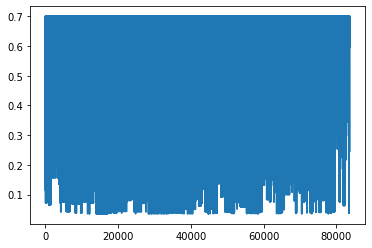

In [43]:
plt.plot(brookS1.occupancy_rate_final)

In [31]:
brookS1.occupancy_rate[brookS1.minimum_nights > brookS1.available].count()

332

In [32]:
brookS1.shape

(39936, 41)

In [33]:
brookS1.occupancy_rate[brookS1.occupancy_rate > 1].count()

24863

In [36]:
brookS1.occupancy_rate[brookS1.occupancy_rate_1 > 1].count()

18942

In [37]:
brookS1.occupancy_rate[brookS1.occupancy_rate_2 > 1].count()

9911

In [40]:
brookS1.occupancy_rate[brookS1.occupancy_rate_final > 1].count()

19282

In [239]:
brookS2 = brookS1[brookS1.occupancy_rate <= 1.00]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


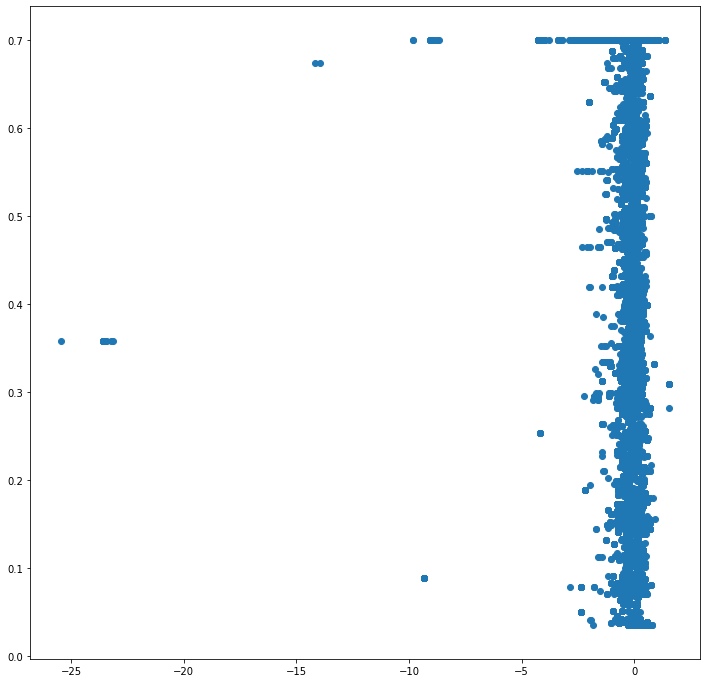

In [44]:
brookS1['price_rate'] = (brookS1.resridge_price/brookS1.price)
plt.figure(figsize=(12,12))
plt.scatter(brookS1.price_rate, brookS1.occupancy_rate_final)

In [45]:
brookS3 = brookS1[brookS1.price_rate >= -1.00]

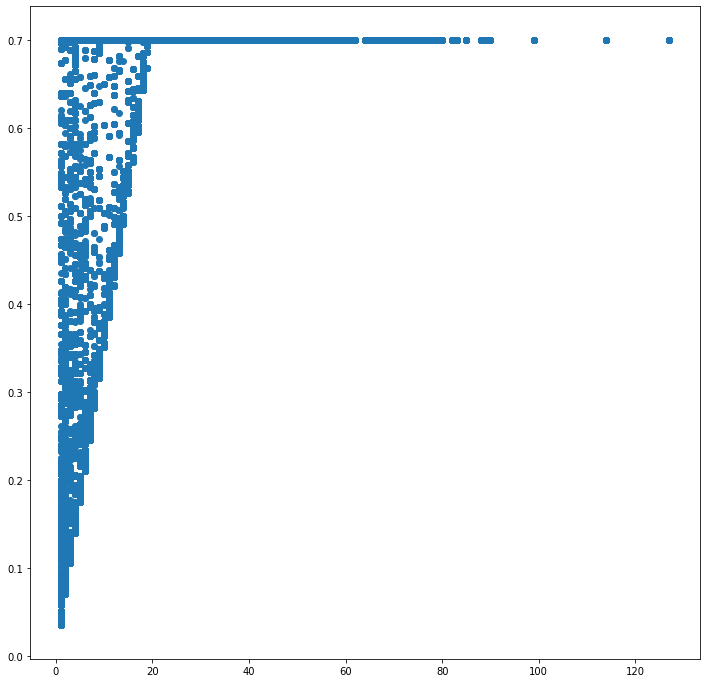

In [46]:
plt.figure(figsize=(12,12))
plt.scatter(brookS3.numReviews18, brookS3.occupancy_rate_final)

In [47]:
brookS3.corr()

,Unnamed: 0,id,host_id,latitude,longitude,cleaning_fee,price,host_is_superhost,host_total_listings_count,accommodates,...,minimum_nights,available,numReviews18,ridge_pred,resridge_price,avgnight,minstay,occupancy_rate,occupancy_rate_final,price_rate
Unnamed: 0,1.000000e+00,2.794595e-02,4.574177e-02,-2.965106e-01,-3.122962e-01,1.501085e-02,2.745883e-02,-3.965616e-02,-7.476518e-04,-2.159152e-04,...,5.461092e-03,-2.563011e-02,-2.692738e-02,2.575884e-02,1.349759e-02,2.283428e-13,5.410726e-03,-1.253592e-02,-2.501960e-02,2.155415e-02
id,2.794595e-02,1.000000e+00,5.224719e-01,-5.180621e-02,5.294160e-02,-6.084892e-02,-4.580953e-02,-8.219216e-02,1.435935e-02,2.448689e-02,...,-7.463295e-02,-2.302865e-01,-7.784052e-03,-4.938097e-02,-1.467548e-02,1.247532e-14,-5.529933e-02,1.222476e-01,1.370464e-01,4.452568e-03
host_id,4.574177e-02,5.224719e-01,1.000000e+00,-1.620435e-01,1.176167e-01,-3.691055e-02,-5.085042e-02,-1.983504e-02,2.636579e-02,9.450257e-02,...,-7.729508e-02,1.633279e-02,1.433434e-01,-6.651922e-02,-1.964779e-03,-3.029050e-14,-5.055852e-02,5.905069e-02,1.061724e-01,3.607407e-02
latitude,-2.965106e-01,-5.180621e-02,-1.620435e-01,1.000000e+00,1.751178e-01,1.270804e-01,1.819873e-01,-1.169501e-02,-1.727575e-02,-6.622952e-02,...,1.226089e-02,-9.614769e-02,-5.428080e-02,2.374828e-01,7.743078e-03,-1.654383e-11,6.928448e-03,4.248406e-02,-1.414344e-02,-7.926147e-02
longitude,-3.122962e-01,5.294160e-02,1.176167e-01,1.751178e-01,1.000000e+00,-9.806453e-02,-1.626358e-01,2.543334e-02,6.235186e-02,8.557993e-02,...,-5.272817e-02,9.701366e-02,1.174599e-01,-2.076619e-01,-1.251107e-02,3.554694e-11,-4.137103e-02,1.363226e-02,5.832516e-02,6.328761e-02
cleaning_fee,1.501085e-02,-6.084892e-02,-3.691055e-02,1.270804e-01,-9.806453e-02,1.000000e+00,5.643529e-01,2.213882e-02,1.241678e-01,4.665021e-01,...,6.493601e-02,1.024935e-01,-1.156044e-01,7.127169e-01,5.305689e-02,-1.117529e-14,4.945549e-02,-1.173240e-01,-1.220280e-01,-1.136795e-01
price,2.745883e-02,-4.580953e-02,-5.085042e-02,1.819873e-01,-1.626358e-01,5.643529e-01,1.000000e+00,3.571813e-02,1.184036e-01,5.778908e-01,...,-4.117699e-02,6.246600e-02,-1.054984e-01,7.939359e-01,6.679949e-01,3.797109e-14,-3.685246e-02,-1.191689e-01,-1.497072e-01,3.987891e-01
host_is_superhost,-3.965616e-02,-8.219216e-02,-1.983504e-02,-1.169501e-02,2.543334e-02,2.213882e-02,3.571813e-02,1.000000e+00,3.274697e-02,5.233346e-02,...,-7.744453e-02,1.668178e-01,3.716117e-01,1.020943e-02,4.607242e-02,-1.107998e-17,-6.304397e-02,1.131730e-01,2.130138e-01,5.979522e-02
host_total_listings_count,-7.476518e-04,1.435935e-02,2.636579e-02,-1.727575e-02,6.235186e-02,1.241678e-01,1.184036e-01,3.274697e-02,1.000000e+00,1.876690e-01,...,1.591326e-02,1.203054e-01,2.044065e-02,1.176065e-01,5.020559e-02,-5.327156e-16,2.201855e-02,-4.492982e-02,-4.517786e-02,-1.744913e-02
accommodates,-2.159152e-04,2.448689e-02,9.450257e-02,-6.622952e-02,8.557993e-02,4.665021e-01,5.778908e-01,5.233346e-02,1.876690e-01,1.000000e+00,...,-8.431557e-02,1.651672e-01,1.393430e-01,7.167802e-01,7.028219e-02,4.213730e-15,-6.460561e-02,-6.025982e-02,1.300071e-02,-5.713483e-02


In [104]:
brookS4 = brookS3[['id', 'price', 'available', 'avgnight', 'minstay', 'numReviews18', 'occupancy_rate_final']]

In [120]:
brookS4.iloc[1273:1279, :]

,id,price,available,avgnight,minstay,numReviews18,occupancy_rate_final
2421,577824,80.0,356.0,6.4,7.0,5.0,0.196629
2422,690603,155.0,343.0,6.4,6.4,23.0,0.700000
2423,849603,75.0,332.0,6.4,6.4,12.0,0.462651
2425,1177725,120.0,254.0,6.4,6.4,6.0,0.302362
2437,3004348,90.0,309.0,6.4,6.4,65.0,0.700000
2438,3177702,155.0,347.0,6.4,6.4,13.0,0.479539


In [261]:
#brook['res_price'] = brook['price'] - brook['predicted_price']
#brook.head()

In [58]:
brookS3.resridge_price[brookS3.resridge_price > 0.0].count()

17684

In [59]:
brookS3.resridge_price[brookS3.resridge_price < 0.0].count()

21409

In [60]:
brookS3.shape

(39093, 44)

In [258]:
#brook.available[brook.available < (2*brook.numReviews18)].count()

In [257]:
#brook1 = brook[brook.available > (2*brook.numReviews18)]
#brook1.shape

In [256]:
#brook1.minimum_nights[brook1.minimum_nights > 6.4].count()

In [255]:
#brook1['minstay'] = brook1.loc[:,[6.4, 'minimum_nights']].max(axis=1)

In [254]:
#brook1['occupancy_rate'] = (((2*brook1.numReviews18)*brook1.minstay)/brook1.available)
#brook1.head()

In [253]:
#plt.plot(brook1.occupancy_rate)

In [252]:
#brook1.sort_values(by = ['occupancy_rate'], ascending = False)

In [251]:
#brook1.occupancy_rate[brook1.minimum_nights > brook1.available].count()

In [250]:
#plt.figure(figsize=(12,12))
#plt.scatter(brook1.res_price, brook1.occupancy_rate)

In [175]:
#brook2 = brook1[brook1.occupancy_rate <= 1.00]

In [244]:
#brook2.head()

In [245]:
#np.mean(brook2.occupancy_rate)

In [246]:
#brook2['price_rate'] = (brook2.res_price/brook2.price)
#plt.figure(figsize=(12,12))
#plt.scatter(brook2.price_rate, brook2.occupancy_rate)

In [247]:
#brook2.sort_values(by = ['price_rate'])

In [188]:
#brook3 = brook2[brook2.price_rate >= -1.00]

In [248]:
#plt.figure(figsize=(12,12))
#plt.scatter(brook3.numReviews18, brook3.occupancy_rate)

In [249]:
#brook3.corr()

In [54]:
np.mean(brookS3.occupancy_rate_final)

0.6009923942476235

In [61]:
brookS3['income'] = brookS3['occupancy_rate_final']*brookS3.available * brookS3.price
brookS3.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,id,last_scraped,name,summary,description,host_id,neighbourhood_group_cleansed,state,latitude,...,numReviews18,ridge_pred,resridge_price,avgnight,minstay,occupancy_rate,occupancy_rate_final,price_rate,lprice,income
0,0,19330743,2018-04-07,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,Brooklyn,NY,40.640762,...,23.0,56.430852,33.569148,6.4,6.4,1.949669,0.700000,0.372991,4.499810,9513.0
1,1,22632338,2018-04-08,Renovated 3 bedroom Suite,Beautifully renovated 3 floor townhouse. The a...,Beautifully renovated 3 floor townhouse. The a...,156042211,Brooklyn,NY,40.649942,...,21.0,115.598136,4.401864,6.4,6.4,0.829630,0.700000,0.036682,4.787492,27216.0
2,2,1178231,2018-04-08,"Private, Cozy hideaway apt in Bklyn for 2 to 4.","Enjoy your visit in a cozy, safe apt. Buses an...","Enjoy your visit in a cozy, safe apt. Buses an...",6445684,Brooklyn,NY,40.642983,...,4.0,112.026031,-12.026031,6.4,6.4,0.151479,0.151479,-0.120260,4.605170,5120.0
3,3,1178231,2018-08-07,"Private, Cozy hideaway apt in Bklyn for 2 to 4.","Enjoy your visit in a cozy, safe apt. Buses an...","Enjoy your visit in a cozy, safe apt. Buses an...",6445684,Brooklyn,NY,40.642983,...,4.0,112.026031,-12.026031,6.4,6.4,0.151479,0.151479,-0.120260,4.605170,5120.0
4,4,19330743,2018-08-07,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,Brooklyn,NY,40.640762,...,23.0,53.497780,36.502220,6.4,6.4,1.949669,0.700000,0.405580,4.499810,9513.0


In [48]:
import geopandas as gpd

In [49]:
from shapely.geometry import Point, Polygon
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip (brookS3['longitude'], brookS3['latitude'])]
brook_geo = gpd.GeoDataFrame(brookS3, crs=crs, geometry=geometry)

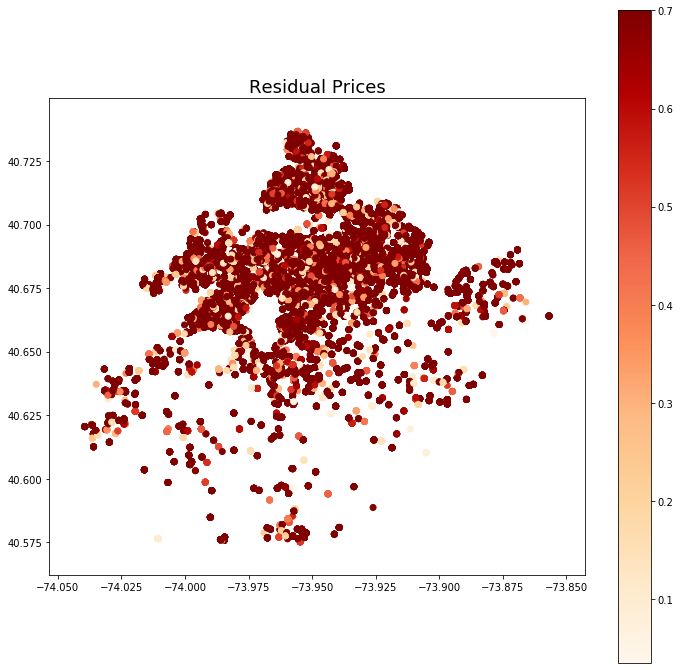

In [52]:
#brook_geo['logres'] = np.log(brook_geo['res_price'])
fig, ax = plt.subplots(1, figsize = (12, 12))
ax.set_title('Residual Prices', fontsize = 18)
brook_geo.plot(ax = ax, column = 'occupancy_rate_final', legend = True, cmap = 'OrRd')

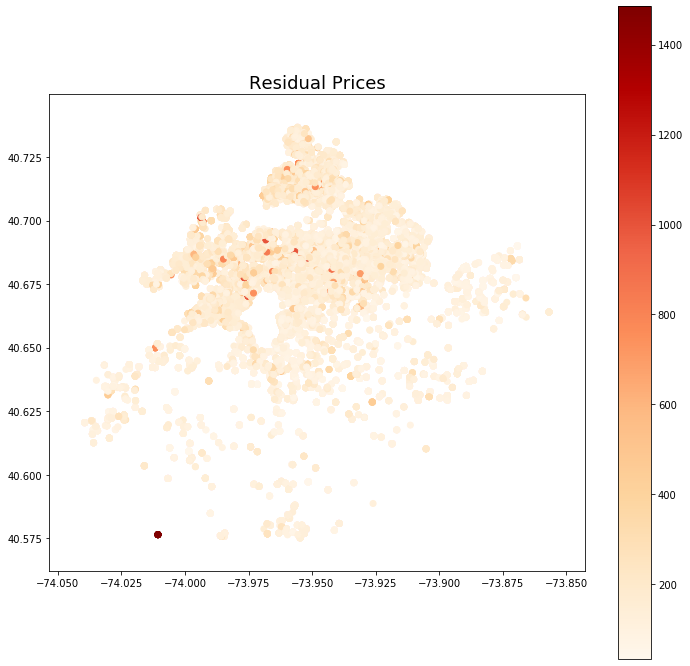

In [55]:
fig, ax = plt.subplots(1, figsize = (12, 12))
ax.set_title('Residual Prices', fontsize = 18)
brook_geo.plot(ax = ax, column = 'price', legend = True, cmap = 'OrRd')

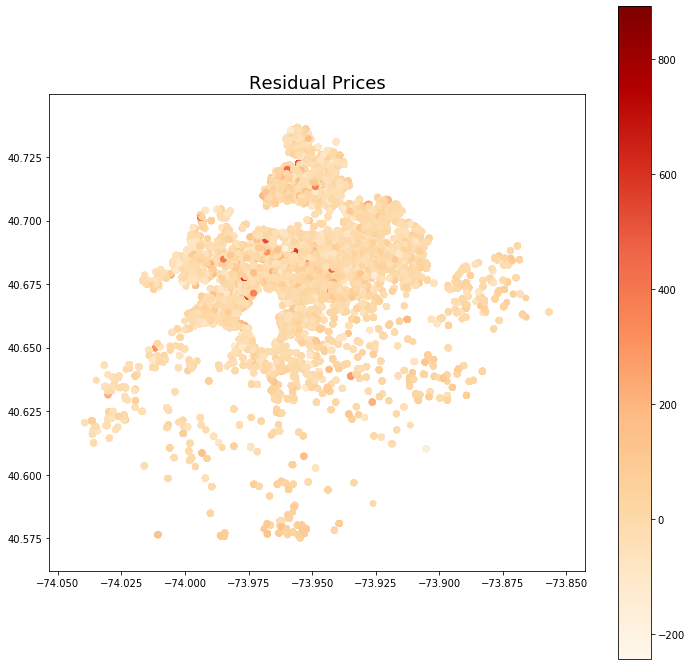

In [56]:
fig, ax = plt.subplots(1, figsize = (12, 12))
ax.set_title('Residual Prices', fontsize = 18)
brook_geo.plot(ax = ax, column = 'resridge_price', legend = True, cmap = 'OrRd')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


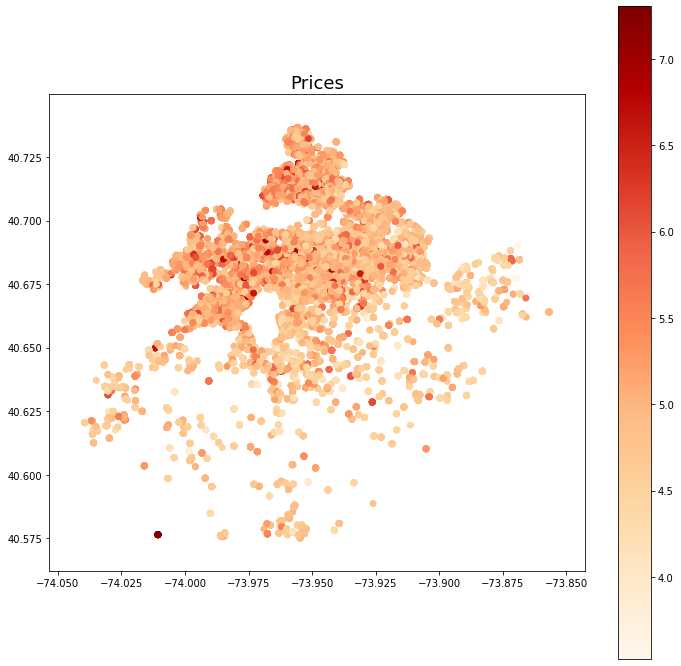

In [57]:
brookS3['lprice'] = np.log(brookS3.price)
fig, ax = plt.subplots(1, figsize = (12, 12))
ax.set_title('Prices', fontsize = 18)
brook_geo.plot(ax = ax, column = 'lprice', legend = True, cmap = 'OrRd')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


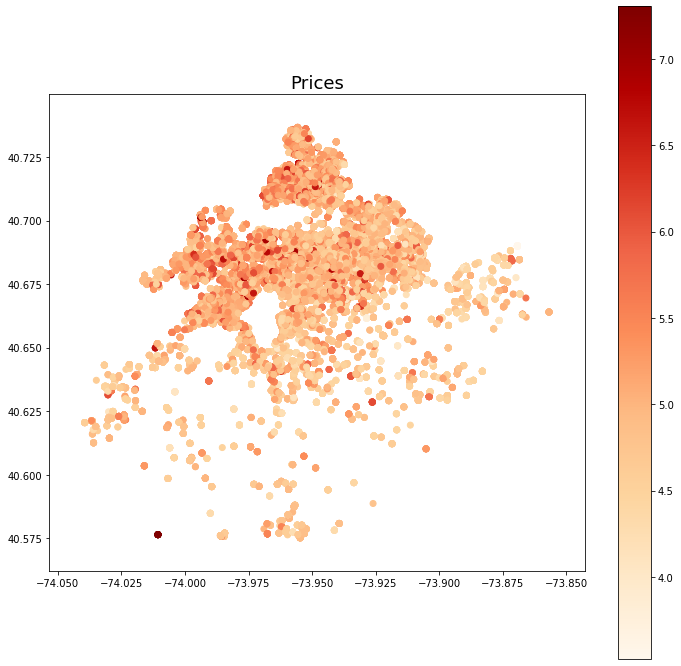

In [39]:
brookS3['lprice'] = np.log(brookS3.price)
fig, ax = plt.subplots(1, figsize = (12, 12))
ax.set_title('Prices', fontsize = 18)
brook_geo.plot(ax = ax, column = 'lprice', legend = True, cmap = 'OrRd')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


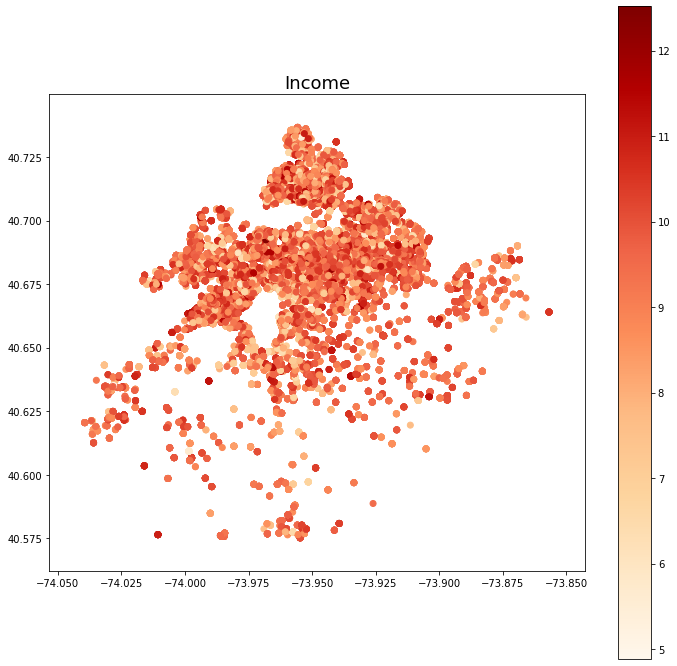

In [63]:
brookS3['lincome'] = np.log(brookS3.income)
fig, ax = plt.subplots(1, figsize = (12, 12))
ax.set_title('Income', fontsize = 18)
brook_geo.plot(ax = ax, column = 'lincome', legend = True, cmap = 'OrRd')

In [73]:
brookS3['incincome'] = (brookS3['occupancy_rate_final']*1.06)*brookS3.available * (brookS3.price*0.95)
brookS3.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,id,last_scraped,name,summary,description,host_id,neighbourhood_group_cleansed,state,latitude,...,avgnight,minstay,occupancy_rate,occupancy_rate_final,price_rate,lprice,income,lincome,incincome,indiff
0,0,19330743,2018-04-07,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,Brooklyn,NY,40.640762,...,6.4,6.4,1.949669,0.700000,0.372991,4.499810,9513.0,9.160415,9579.591,428.085
1,1,22632338,2018-04-08,Renovated 3 bedroom Suite,Beautifully renovated 3 floor townhouse. The a...,Beautifully renovated 3 floor townhouse. The a...,156042211,Brooklyn,NY,40.649942,...,6.4,6.4,0.829630,0.700000,0.036682,4.787492,27216.0,10.211560,27406.512,1224.720
2,2,1178231,2018-04-08,"Private, Cozy hideaway apt in Bklyn for 2 to 4.","Enjoy your visit in a cozy, safe apt. Buses an...","Enjoy your visit in a cozy, safe apt. Buses an...",6445684,Brooklyn,NY,40.642983,...,6.4,6.4,0.151479,0.151479,-0.120260,4.605170,5120.0,8.540910,5155.840,230.400
3,3,1178231,2018-08-07,"Private, Cozy hideaway apt in Bklyn for 2 to 4.","Enjoy your visit in a cozy, safe apt. Buses an...","Enjoy your visit in a cozy, safe apt. Buses an...",6445684,Brooklyn,NY,40.642983,...,6.4,6.4,0.151479,0.151479,-0.120260,4.605170,5120.0,8.540910,5155.840,230.400
4,4,19330743,2018-08-07,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,Brooklyn,NY,40.640762,...,6.4,6.4,1.949669,0.700000,0.405580,4.499810,9513.0,9.160415,9579.591,428.085


In [74]:
brookS3['indiff'] = brookS3.incincome - brookS3.income
brookS3.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,id,last_scraped,name,summary,description,host_id,neighbourhood_group_cleansed,state,latitude,...,avgnight,minstay,occupancy_rate,occupancy_rate_final,price_rate,lprice,income,lincome,incincome,indiff
0,0,19330743,2018-04-07,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,Brooklyn,NY,40.640762,...,6.4,6.4,1.949669,0.700000,0.372991,4.499810,9513.0,9.160415,9579.591,66.591
1,1,22632338,2018-04-08,Renovated 3 bedroom Suite,Beautifully renovated 3 floor townhouse. The a...,Beautifully renovated 3 floor townhouse. The a...,156042211,Brooklyn,NY,40.649942,...,6.4,6.4,0.829630,0.700000,0.036682,4.787492,27216.0,10.211560,27406.512,190.512
2,2,1178231,2018-04-08,"Private, Cozy hideaway apt in Bklyn for 2 to 4.","Enjoy your visit in a cozy, safe apt. Buses an...","Enjoy your visit in a cozy, safe apt. Buses an...",6445684,Brooklyn,NY,40.642983,...,6.4,6.4,0.151479,0.151479,-0.120260,4.605170,5120.0,8.540910,5155.840,35.840
3,3,1178231,2018-08-07,"Private, Cozy hideaway apt in Bklyn for 2 to 4.","Enjoy your visit in a cozy, safe apt. Buses an...","Enjoy your visit in a cozy, safe apt. Buses an...",6445684,Brooklyn,NY,40.642983,...,6.4,6.4,0.151479,0.151479,-0.120260,4.605170,5120.0,8.540910,5155.840,35.840
4,4,19330743,2018-08-07,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,Brooklyn,NY,40.640762,...,6.4,6.4,1.949669,0.700000,0.405580,4.499810,9513.0,9.160415,9579.591,66.591


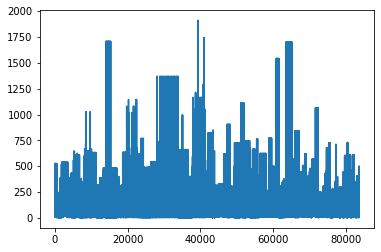

In [75]:
plt.plot(brookS3.indiff)

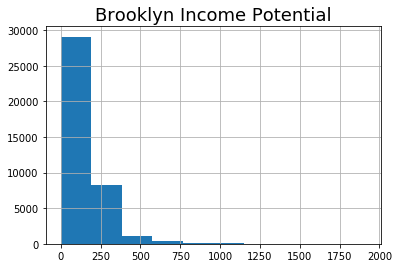

In [76]:
fig, ax = plt.subplots()
#ax.set_xscale('log')
ax.set_title('Brooklyn Income Potential', fontsize = 18)
brookS3.indiff.hist(ax=ax, bins = 10)

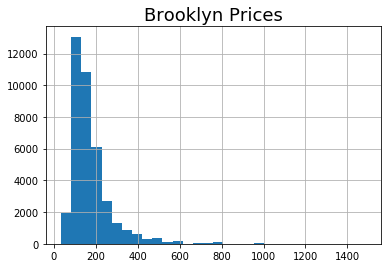

In [78]:
fig, ax = plt.subplots()
#ax.set_xscale('log')
ax.set_title('Brooklyn Prices', fontsize = 18)
brookS3.price.hist(ax=ax, bins = 30)

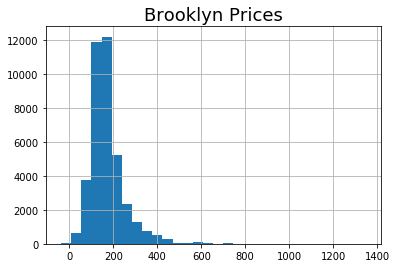

In [122]:
fig, ax = plt.subplots()
#ax.set_xscale('log')
ax.set_title('Brooklyn Prices', fontsize = 18)
brookS3.ridge_pred.hist(ax=ax, bins = 30)

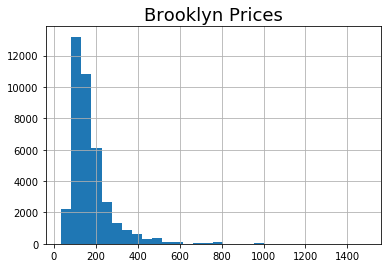

In [123]:
fig, ax = plt.subplots()
#ax.set_xscale('log')
ax.set_title('Brooklyn Prices', fontsize = 18)
brookS3.price.hist(ax=ax, bins = 30)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


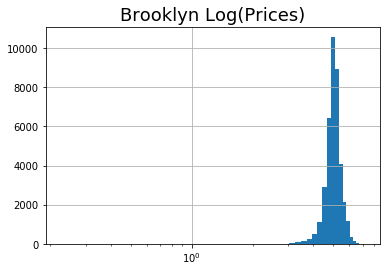

In [124]:
brookS3['lpred'] = np.log(brookS3.ridge_pred)
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_title('Brooklyn Log(Prices)', fontsize = 18)
brookS3.lpred.hist(ax=ax, bins = 30)

In [133]:
brookS3.corr()

,Unnamed: 0,id,host_id,latitude,longitude,cleaning_fee,price,host_is_superhost,host_total_listings_count,accommodates,...,minstay,occupancy_rate,occupancy_rate_final,price_rate,lprice,income,lincome,incincome,indiff,lpred
Unnamed: 0,1.000000e+00,2.794595e-02,4.574177e-02,-2.965106e-01,-3.122962e-01,1.501085e-02,2.745883e-02,-3.965616e-02,-7.476518e-04,-2.159152e-04,...,5.410726e-03,-1.253592e-02,-2.501960e-02,2.155415e-02,4.492780e-03,-1.321885e-02,-1.839207e-02,-1.321885e-02,-1.321885e-02,-1.012753e-02
id,2.794595e-02,1.000000e+00,5.224719e-01,-5.180621e-02,5.294160e-02,-6.084892e-02,-4.580953e-02,-8.219216e-02,1.435935e-02,2.448689e-02,...,-5.529933e-02,1.222476e-01,1.370464e-01,4.452568e-03,-4.878858e-02,-9.992306e-02,-1.174279e-01,-9.992306e-02,-9.992306e-02,-6.476752e-02
host_id,4.574177e-02,5.224719e-01,1.000000e+00,-1.620435e-01,1.176167e-01,-3.691055e-02,-5.085042e-02,-1.983504e-02,2.636579e-02,9.450257e-02,...,-5.055852e-02,5.905069e-02,1.061724e-01,3.607407e-02,-6.590145e-02,3.029382e-02,8.123448e-02,3.029382e-02,3.029382e-02,-1.115650e-01
latitude,-2.965106e-01,-5.180621e-02,-1.620435e-01,1.000000e+00,1.751178e-01,1.270804e-01,1.819873e-01,-1.169501e-02,-1.727575e-02,-6.622952e-02,...,6.928448e-03,4.248406e-02,-1.414344e-02,-7.926147e-02,2.674850e-01,5.823649e-02,1.121191e-02,5.823649e-02,5.823649e-02,3.686117e-01
longitude,-3.122962e-01,5.294160e-02,1.176167e-01,1.751178e-01,1.000000e+00,-9.806453e-02,-1.626358e-01,2.543334e-02,6.235186e-02,8.557993e-02,...,-4.137103e-02,1.363226e-02,5.832516e-02,6.328761e-02,-2.003797e-01,-8.915168e-03,3.495667e-02,-8.915168e-03,-8.915168e-03,-2.591637e-01
cleaning_fee,1.501085e-02,-6.084892e-02,-3.691055e-02,1.270804e-01,-9.806453e-02,1.000000e+00,5.643529e-01,2.213882e-02,1.241678e-01,4.665021e-01,...,4.945549e-02,-1.173240e-01,-1.220280e-01,-1.136795e-01,5.543054e-01,3.554409e-01,2.641443e-01,3.554409e-01,3.554409e-01,6.743685e-01
price,2.745883e-02,-4.580953e-02,-5.085042e-02,1.819873e-01,-1.626358e-01,5.643529e-01,1.000000e+00,3.571813e-02,1.184036e-01,5.778908e-01,...,-3.685246e-02,-1.191689e-01,-1.497072e-01,3.987891e-01,9.122743e-01,5.565167e-01,3.433217e-01,5.565167e-01,5.565167e-01,6.711235e-01
host_is_superhost,-3.965616e-02,-8.219216e-02,-1.983504e-02,-1.169501e-02,2.543334e-02,2.213882e-02,3.571813e-02,1.000000e+00,3.274697e-02,5.233346e-02,...,-6.304397e-02,1.131730e-01,2.130138e-01,5.979522e-02,6.412959e-02,2.252840e-01,2.974546e-01,2.252840e-01,2.252840e-01,3.177499e-02
host_total_listings_count,-7.476518e-04,1.435935e-02,2.636579e-02,-1.727575e-02,6.235186e-02,1.241678e-01,1.184036e-01,3.274697e-02,1.000000e+00,1.876690e-01,...,2.201855e-02,-4.492982e-02,-4.517786e-02,-1.744913e-02,8.157551e-02,1.186938e-01,1.156566e-01,1.186938e-01,1.186938e-01,8.307501e-02
accommodates,-2.159152e-04,2.448689e-02,9.450257e-02,-6.622952e-02,8.557993e-02,4.665021e-01,5.778908e-01,5.233346e-02,1.876690e-01,1.000000e+00,...,-6.460561e-02,-6.025982e-02,1.300071e-02,-5.713483e-02,5.520968e-01,4.972611e-01,3.873847e-01,4.972611e-01,4.972611e-01,6.237590e-01


In [188]:
brookS3.resridge_price[(brookS3.resridge_price <= 50) & (brookS3.resridge_price >= -50)].count()

27856

In [189]:
brookS3.shape

(39093, 49)

In [190]:
x = (27856/39093)
print(x)

0.7125572353106694


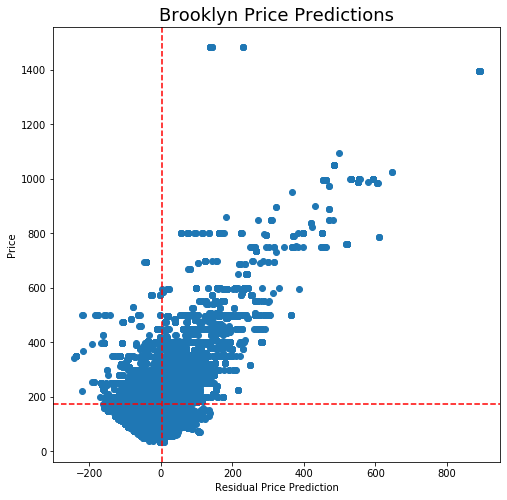

In [184]:
#fig, ax = plt.subplots()
#ax.set_xscale('log')
fig, ax = plt.subplots(1, figsize = (8, 8))
ax.set_title('Brooklyn Price Predictions', fontsize = 18)
ax.set_xlabel('Residual Price Prediction')
ax.set_ylabel('Price')
plt.scatter(brookS3.resridge_price, brookS3.price)
mn = np.mean(brookS3['resridge_price'])
ax.axvline(x=mn, color = 'red', linestyle = '--')
m = np.mean(brookS3.price)
ax.axhline(y=m, color = 'red', linestyle = '--')
#ax.axvline(x=-50, color = 'red', linestyle = '--')
#plt.plot(brookS3.resridge_price=0, color = 'red')

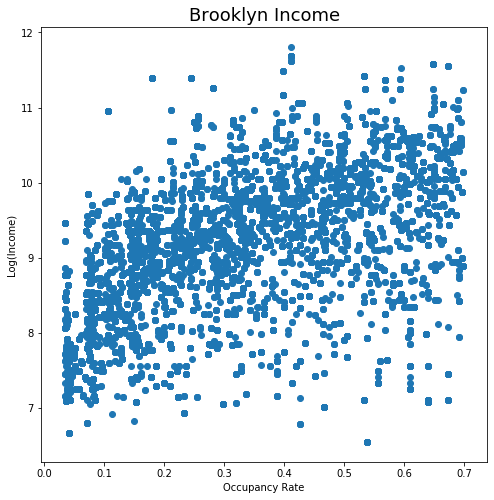

In [196]:

fig, ax = plt.subplots(1, figsize = (8, 8))
ax.set_title('Brooklyn Income', fontsize = 18)
ax.set_xlabel('Occupancy Rate')
ax.set_ylabel('Log(Income)')
plt.scatter(br.occupancy_rate_final, br.lincome)

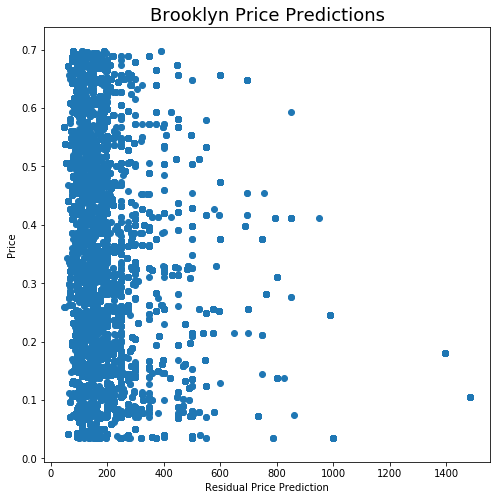

In [197]:
#fig, ax = plt.subplots()
#ax.set_xscale('log')
fig, ax = plt.subplots(1, figsize = (8, 8))
ax.set_title('Brooklyn Price Predictions', fontsize = 18)
ax.set_xlabel('Residual Price Prediction')
ax.set_ylabel('Price')
plt.scatter(br.price, br.occupancy_rate_final)
#ax.axvline(x=50, color = 'red', linestyle = '--')
#ax.axvline(x=-50, color = 'red', linestyle = '--')
#plt.plot(brookS3.resridge_price=0, color = 'red')

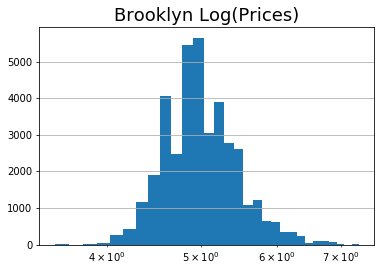

In [79]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_title('Brooklyn Log(Prices)', fontsize = 18)
brookS3.lprice.hist(ax=ax, bins = 30)

In [171]:
br = brookS3[brookS3.occupancy_rate_final < 0.7]

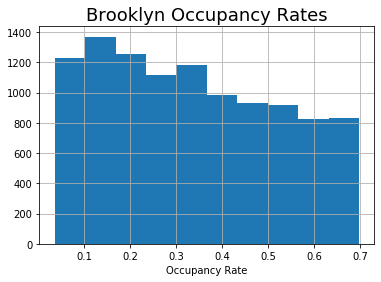

In [178]:
fig, ax = plt.subplots()
#ax.set_xscale('log')
ax.set_title('Brooklyn Occupancy Rates', fontsize = 18)
ax.set_xlabel('Occupancy Rate')
br.occupancy_rate_final.hist(ax=ax, bins = 10)

In [67]:
brookS3['lres'] = np.log(brookS3.resridge_price)
brookS3.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,id,last_scraped,name,summary,description,host_id,neighbourhood_group_cleansed,state,latitude,...,ridge_pred,resridge_price,avgnight,minstay,occupancy_rate,occupancy_rate_1,occupancy_rate_2,occupancy_rate_final,price_rate,lres
0,0,19330743,2018-04-07,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,Brooklyn,NY,40.640762,...,115.194766,-25.194766,6.4,6.4,1.949669,1.353937,0.913907,0.700000,-0.279942,NaN
1,1,22632338,2018-04-08,Renovated 3 bedroom Suite,Beautifully renovated 3 floor townhouse. The a...,Beautifully renovated 3 floor townhouse. The a...,156042211,Brooklyn,NY,40.649942,...,155.066118,-35.066118,6.4,6.4,0.829630,0.576132,0.259259,0.700000,-0.292218,NaN
2,2,1178231,2018-04-08,"Private, Cozy hideaway apt in Bklyn for 2 to 4.","Enjoy your visit in a cozy, safe apt. Buses an...","Enjoy your visit in a cozy, safe apt. Buses an...",6445684,Brooklyn,NY,40.642983,...,146.000044,-46.000044,6.4,6.4,0.151479,0.105194,0.023669,0.151479,-0.460000,NaN
3,3,1178231,2018-08-07,"Private, Cozy hideaway apt in Bklyn for 2 to 4.","Enjoy your visit in a cozy, safe apt. Buses an...","Enjoy your visit in a cozy, safe apt. Buses an...",6445684,Brooklyn,NY,40.642983,...,146.000044,-46.000044,6.4,6.4,0.151479,0.105194,0.023669,0.151479,-0.460000,NaN
4,4,19330743,2018-08-07,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,Brooklyn,NY,40.640762,...,115.194766,-25.194766,6.4,6.4,1.949669,1.353937,0.913907,0.700000,-0.279942,NaN


In [51]:
brook.columns

Index(['Unnamed: 0', 'id', 'last_scraped', 'name', 'summary', 'description',
       'host_id', 'neighbourhood_group_cleansed', 'state', 'latitude',
       'longitude', 'property_type', 'room_type', 'amenities', 'cleaning_fee',
       'price', 'host_is_superhost', 'host_total_listings_count',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included',
       'review_scores_rating', 'amenities_count', 'geometry',
       'nearest_subwayID', 'subwayLine', 'subwayStop', 'subwayLong',
       'subwayDistance_km', 'subwayLat', 'mhi18', 'minimum_nights',
       'available', 'numReviews18'],
      dtype='object')

In [56]:
brook.id.nunique()

4881

In [58]:
brookS1.head()

,Unnamed: 0,id,last_scraped,name,summary,description,host_id,neighbourhood_group_cleansed,state,latitude,...,numReviews18,ridge_pred,resridge_price,avgnight,minstay,occupancy_rate,occupancy_rate_1,occupancy_rate_2,occupancy_rate_final,price_rate
0,0,19330743,2018-04-07,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,Brooklyn,NY,40.640762,...,23.0,115.194766,-25.194766,6.4,6.4,1.949669,1.353937,0.913907,0.700000,-0.279942
1,1,22632338,2018-04-08,Renovated 3 bedroom Suite,Beautifully renovated 3 floor townhouse. The a...,Beautifully renovated 3 floor townhouse. The a...,156042211,Brooklyn,NY,40.649942,...,21.0,155.066118,-35.066118,6.4,6.4,0.829630,0.576132,0.259259,0.700000,-0.292218
2,2,1178231,2018-04-08,"Private, Cozy hideaway apt in Bklyn for 2 to 4.","Enjoy your visit in a cozy, safe apt. Buses an...","Enjoy your visit in a cozy, safe apt. Buses an...",6445684,Brooklyn,NY,40.642983,...,4.0,146.000044,-46.000044,6.4,6.4,0.151479,0.105194,0.023669,0.151479,-0.460000
3,3,1178231,2018-08-07,"Private, Cozy hideaway apt in Bklyn for 2 to 4.","Enjoy your visit in a cozy, safe apt. Buses an...","Enjoy your visit in a cozy, safe apt. Buses an...",6445684,Brooklyn,NY,40.642983,...,4.0,146.000044,-46.000044,6.4,6.4,0.151479,0.105194,0.023669,0.151479,-0.460000
4,4,19330743,2018-08-07,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,Brooklyn,NY,40.640762,...,23.0,115.194766,-25.194766,6.4,6.4,1.949669,1.353937,0.913907,0.700000,-0.279942


In [59]:
brk = brookS3.copy()

In [61]:
brk.id.nunique()

3970

In [63]:
brk.groupby(['id', 'last_scraped'])
brk.tail()

,Unnamed: 0,id,last_scraped,name,summary,description,host_id,neighbourhood_group_cleansed,state,latitude,...,numReviews18,ridge_pred,resridge_price,avgnight,minstay,occupancy_rate,occupancy_rate_1,occupancy_rate_2,occupancy_rate_final,price_rate
83670,83670,20135361,2018-10-03,Stunning! Brklyn 2BR/2B Residence in the Sky,Luxury and quiet.Sweeping views and welcoming ...,Luxury and quiet.Sweeping views and welcoming ...,118695056,Brooklyn,NY,40.692009,...,13.0,277.343521,-2.343521,6.4,6.4,0.594286,0.412698,0.278571,0.594286,-0.008522
83671,83671,20135361,2018-09-08,Pictureresque -2BR/2BATH Residence in the Sky,Luxury and quiet.Sweeping views and welcoming ...,Luxury and quiet.Sweeping views and welcoming ...,118695056,Brooklyn,NY,40.692009,...,13.0,277.343521,-2.343521,6.4,6.4,0.594286,0.412698,0.278571,0.594286,-0.008522
83675,83675,29060751,2018-12-06,Bright & Clean Apartment in Downtown Brooklyn,Welcome to Brooklyn! The apartment is a 1 bedr...,Welcome to Brooklyn! The apartment is a 1 bedr...,7310733,Brooklyn,NY,40.691122,...,3.0,138.311651,11.688349,6.4,6.4,3.200000,2.222222,1.000000,0.700000,0.077922
83676,83676,29153508,2018-12-06,"Spacious, brand-new Downtown Brooklyn apartment","Come stay at our bright, spacious apartment co...","Come stay at our bright, spacious apartment co...",17604711,Brooklyn,NY,40.690404,...,2.0,153.983697,-33.983697,6.4,7.0,4.666667,3.240741,4.666667,0.700000,-0.283197
83689,83689,29060751,2018-11-04,Bright & Clean Apartment in Downtown Brooklyn,Welcome to Brooklyn! The apartment is a 1 bedr...,Welcome to Brooklyn! The apartment is a 1 bedr...,7310733,Brooklyn,NY,40.691122,...,3.0,138.311651,11.688349,6.4,6.4,3.200000,2.222222,1.000000,0.700000,0.077922


In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime as dt
import scipy

ValueError: x and y must have same first dimension, but have shapes (38657,) and (1,)

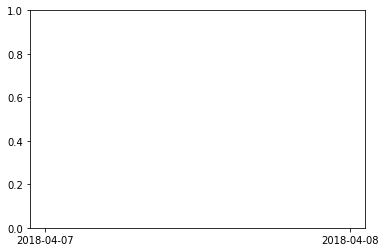

In [65]:
plt.plot(brk.last_scraped, np.mean(brk.price))

In [43]:
import tkinter as tk

In [41]:
m = tk.Tk()
m.title('How to price your Airbnb')

m.mainloop()